In [ ]:
import pandas as pd


In [ ]:
IMDB = pd.read_csv("G:\PHD\Term1\Information retrival\Homework\HW5\CA5\Text Classification\IMDB_Movie_Reviews.csv")
IMDB

,review,sentiment
0,"This film is absolutely awful, but nevertheles...",0
1,Well since seeing part's 1 through 3 I can hon...,0
2,I got to see this film at a preview and was da...,1
3,This adaptation positively butchers a classic ...,0
4,Råzone is an awful movie! It is so simple. It ...,0
...,...,...
24995,With this movie being the only Dirty Harry mov...,1
24996,Any screen adaptation of a John Grisham story ...,1
24997,This film captured my heart from the very begi...,1
24998,A deplorable social condition triggers off the...,1


In [ ]:
# !pip install nltk

import string
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
def preprocessing(text):
    stop_words = stopwords.words('english')
    porter = PorterStemmer()

    #lowercase: 
    text = text.lower()
    #Removing Punctuation 
    text = "".join([char for char in text if char not in string.punctuation])
    #word tokenization : 
    text = word_tokenize(text)
    #stop word filtering: 
    text = [word for word in text if word not in stop_words]
    #stemming: 
    text = [porter.stem(word) for word in text]
    
    return text

    
IMDB['review'] = IMDB['review'].apply(preprocessing)
IMDB


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(IMDB['review'], IMDB['sentiment'], test_size=0.2, random_state=42)
X_train

23311    [think, movi, kind, weird, open, scene, person...
23623    [movi, hyster, havent, laugh, hard, long, time...
1020     [begin, movi, feel, like, movi, anoth, jason, ...
12645    [1953, sam, fuller, movi, contain, best, work,...
1533     [recap, full, moon, creatur, huge, werewolf, h...
                               ...                        
21575    [made, origin, killer, tomato, fun, made, peop...
5390     [perhap, im, date, dont, know, electra, like, ...
860      [director, make, great, film, poltergeist, tex...
15795    [weak, plot, unlik, car, malfunct, helpless, f...
23654    [agre, everyon, opinion, show, poorli, produc,...
Name: review, Length: 20000, dtype: object

In [ ]:
from collections import Counter
all_words = [] 

for i in list(X_train):
    all_words += i
    
    
vocab = Counter(all_words)

vocab = {k: v for k, v in sorted(vocab.items(), key=lambda item: item[1],reverse=True)}

In [ ]:
len(set(all_words))

81956

In [ ]:
word_to_id = {j:i for i,j in enumerate(list(vocab.keys())[:3000])}
id_to_word = dict(zip(list(word_to_id.values()),list(word_to_id.keys())))


In [ ]:

import numpy as np

all_sen = []
for i in list(X_train):
    temp = np.zeros(3000)
    for j in i:
        if j in list(word_to_id.keys()):
            temp[word_to_id[j]] +=1
    all_sen.append(temp)


In [ ]:
all_sen = np.array(all_sen)
all_sen

array([[0., 4., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [2., 4., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 2., ..., 0., 0., 0.],
       [1., 2., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:

all_sen_test = []
for i in list(X_test):
    temp = np.zeros(3000)
    for j in i:
        if j in list(word_to_id.keys()):
            temp[word_to_id[j]] +=1
    all_sen_test.append(temp)
all_sen_test = np.array(all_sen_test)

# SVM: 

In [ ]:
from sklearn import svm

clf = svm.SVC()
clf.fit(all_sen, list(y_train))

SVC()

In [ ]:
label_test = clf.predict(all_sen_test)

# f1 , Precision, Recall , accuracy(SVM)

In [ ]:
from sklearn.metrics import f1_score
print("f1 score is : ",f1_score(list(y_test), label_test,average='binary'))

f1 score is :  0.8711512061188468


In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy is : ",accuracy_score(list(y_test), label_test))

Accuracy is :  0.8686


In [ ]:
from sklearn.metrics import recall_score

print("Recall is: ",recall_score(list(y_test), label_test,average='binary'))

Recall is:  0.8988263860785107


In [ ]:
from sklearn.metrics import precision_score
print("precision is :",precision_score(list(y_test), label_test,average='binary'))


precision is : 0.8451293759512938


# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred_nv = gnb.fit(all_sen, list(y_train)).predict(all_sen_test)



In [ ]:
from sklearn.metrics import f1_score
print("f1 score is:" , f1_score(list(y_test), y_pred_nv,average='binary'))

f1 score is: 0.7035681610247025


In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy score is:" , accuracy_score(list(y_test), y_pred_nv))


Accuracy score is: 0.7408


In [ ]:
print("Recall is: ",recall_score(list(y_test), y_pred_nv,average='binary'))

Recall is:  0.622420072845002


In [ ]:
print("precision is :",precision_score(list(y_test), y_pred_nv,average='binary'))


precision is : 0.8090478695423461


# Logistic Regression: 

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(all_sen, list(y_train))
y_pred_lr = clf.predict(all_sen_test)

C:\Users\mhmsadegh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import f1_score
print("f1 score is:" , f1_score(list(y_test), y_pred_lr,average='binary'))

f1 score is: 0.8602838297021788


In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy score is:" , accuracy_score(list(y_test), y_pred_lr))


Accuracy score is: 0.8602


In [ ]:
from sklearn.metrics import recall_score

print("Recall is: ",recall_score(list(y_test), y_pred_lr,average='binary'))

Recall is:  0.8709024686361797


In [ ]:
from sklearn.metrics import precision_score
print("precision is :",precision_score(list(y_test), y_pred_lr,average='binary'))


precision is : 0.8499210110584519


# TF / IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
word_stems_train = []
word_stems_test = []

for i in list(X_train):
    word_stems_train.append(" ".join(i))
    
for i in list(X_test):
    word_stems_test.append(" ".join(i))    
    




In [ ]:
vectorizer = TfidfVectorizer(max_features=3000)
train_features = vectorizer.fit_transform(list(word_stems_train))

dense = train_features.todense()
denselist = dense.tolist()
train_TFIDF = pd.DataFrame(denselist,columns=vectorizer.get_feature_names())
train_TFIDF

C:\Users\mhmsadegh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,10,100,1010,11,110,12,13,14,15,17,...,youd,youll,young,younger,your,youth,youv,zero,zombi,zone
0,0.176911,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.038212,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
19996,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
19997,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
19998,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


# SVM

In [ ]:
from sklearn import svm

clf_ = svm.SVC()
clf_.fit(train_TFIDF.to_numpy(), list(y_train))

SVC()

In [ ]:
test_features = vectorizer.transform(word_stems_test)


df_Test = pd.DataFrame(test_features.todense().tolist(),columns=vectorizer.get_feature_names())


label_test_svm = clf_.predict(df_Test.to_numpy())

C:\Users\mhmsadegh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.metrics import f1_score
print("f1 score is : ",f1_score(list(y_test), label_test_svm,average='binary'))

f1 score is :  0.8806176994654524


In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy score is:" , accuracy_score(list(y_test), label_test_svm))


Accuracy score is: 0.8794


In [ ]:
print("Recall is: ",recall_score(list(y_test), label_test_svm,average='binary'))

Recall is:  0.9000404694455686


In [ ]:
print("precision is :",precision_score(list(y_test), label_test_svm,average='binary'))


precision is : 0.862015503875969


# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred_nv_Tfidf = gnb.fit(train_TFIDF.to_numpy(), list(y_train)).predict(df_Test.to_numpy())


In [ ]:
from sklearn.metrics import f1_score
print("f1 score is : ",f1_score(list(y_test), y_pred_nv_Tfidf,average='binary'))

f1 score is :  0.8056338028169013


In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy score is:" , accuracy_score(list(y_test), y_pred_nv_Tfidf))


Accuracy score is: 0.8068


In [ ]:
print("Recall is: ",recall_score(list(y_test), y_pred_nv_Tfidf,average='binary'))

Recall is:  0.8101983002832861


In [ ]:
print("precision is :",precision_score(list(y_test), y_pred_nv_Tfidf,average='binary'))


precision is : 0.8011204481792717


# logistic Regression : 

In [ ]:
from sklearn.linear_model import LogisticRegression
clf_tfidf = LogisticRegression(random_state=0).fit(train_TFIDF.to_numpy(), list(y_train))
y_pred_lr_tfifd = clf_tfidf.predict(df_Test.to_numpy())

In [ ]:
from sklearn.metrics import f1_score
print("f1 score is : ",f1_score(list(y_test), y_pred_lr_tfifd,average='binary'))

f1 score is :  0.8787040695377321


In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy score is:" , accuracy_score(list(y_test), y_pred_lr_tfifd))


Accuracy score is: 0.8772


In [ ]:
print("Recall is: ",recall_score(list(y_test), y_pred_lr_tfifd,average='binary'))

Recall is:  0.9000404694455686


In [ ]:
print("precision is :",precision_score(list(y_test), y_pred_lr_tfifd,average='binary'))


precision is : 0.8583558471632574


# Comparing with plot :

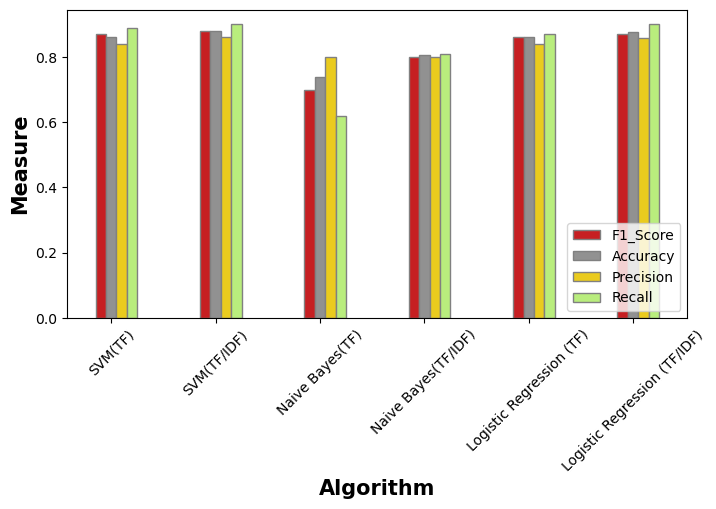

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.1
fig = plt.subplots(figsize =(8, 4))
 
# set height of bar
f1score = [0.87,0.88,0.7,0.8,0.86,0.87]
accuracy = [0.86,0.8794,0.74,0.8068,0.86,0.8772]
precision = [0.84,0.86,0.80,0.80,0.84,0.8583]
recall = [0.89,0.90,0.62,0.81,0.87,0.90]
 
# Set position of bar on X axis
br1 = np.arange(len(f1score))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
 
# Make the plot
plt.bar(br1, f1score, color ='#c61f22', width = barWidth,
        edgecolor ='grey', label ='F1_Score')
plt.bar(br2, accuracy, color ='#919191', width = barWidth,
        edgecolor ='grey', label ='Accuracy')
plt.bar(br3, precision, color ='#eacb1e', width = barWidth,
        edgecolor ='grey', label ='Precision')
plt.bar(br4, recall, color ='#b9ed7d', width = barWidth,
        edgecolor ='grey', label ='Recall') 
    
    
# Adding Xticks
plt.xlabel('Algorithm', fontweight ='bold', fontsize = 15)
plt.ylabel('Measure', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(f1score))],
        ['SVM(TF)', 'SVM(TF/IDF)', 'Naive Bayes(TF)', 'Naive Bayes(TF/IDF)', 'Logistic Regression (TF)', 'Logistic Regression (TF/IDF)'],rotation=45)
 
plt.legend(loc=4)
plt.show()